#**Very First Chapter in Deep Learning with Pytorch**

<img src = 'https://drive.google.com/uc?id=1s-try8jWbH_bZwr-36wpc9RPgRFc0wQh'>


#1. Introduction

##What are neural networks?

As this tutorial is intended for complete beginners, so I will quickly explaining neural networks. It is my firm belief that you're going to learn the most by actually working with this technology, but I will be briefing so it can be useful to have a basic understanding going in.

Neural networks at their core are just another tool in the set of machine learning algorithms.

Neural networks consists of a bunch of "neurons' which are values that start off as your input data, and then get multiplied by weights, summed together, and then passed through an activation function to produce new values, and this process then repeats over however many "layers" your neural network has to then produce an output.

It looks something like :

<img src = 'https://drive.google.com/uc?id=1vn3O9SVy_z1CpheZIti7aRA0k6nKVmNJ'>

The X1, X2, X3 are the "features" of your data. These could be pixel values of an image, or some other numerical characteristic that describes your data.

In your hidden layers ("hidden" just generally refers to the fact that the programmer doesn't really set or control the values to these layers, the machine does), these are neurons, numbering in however many you want (you control how many there are, just not the value of those neurons), and then they lead to an output layer. The output is usually either a single neuron for regression tasks, or as many neurons as you have classes. In the above case, there are 3 output neurons, so maybe this neural network is classifying dogs vs cats vs humans. Each neuron's value can be thought of as a confidence score for if the neural network thinks it's that class.

Whichever neuron has the highest value, that's the predicted class! So maybe the top of the three output neurons is "human," then "dog" in the middle and then "cat" on the bottom. If the human value is the largest one, then that would be the prediction of the neural network.

Connecting all of the neurons are those lines. Each of them is a weight, and possibly a bias. So the inputs get multiplied by the weights, the biases are added in, then it gets summed at the next neuron, passed through an activation function, to be the next input value for the next one!

<img src = 'https://drive.google.com/uc?id=11Ut40yTXMVYJq-lrmgPTaDuzyh3FdfWv'>

Above is an example of this "zoomed in" so to speak to show the mechanism for just a single neuron. You can see the inputs from other neurons come in, they're multiplied by the weights, then they are summed together. After this summation, they pass through an activation function. The activation function's job is to calculate whether or not, or how much, a neuron is "firing." A neuron could output a 0 or 1 to be off or on, but also, more commonly, could instead output a range between 0 and 1, for example, which serves as input to the next layer.

###How does a neural network "learn?"

For now, we'll just consider the "supervised learning" approach, where the programmer shows the neural network the input data, and then also tells the machine what the output should be.

Alright, you're basically an expert now. Let's get to Pytorch. If you're still confused about certain things, that's totally fine. Most, if not all, should be ironed out by actually working with this stuff.

##What is Pytorch?

PyTorch is an open source machine learning library based on the Torch library, that does operations on tensors.

**Used for applications such as computer vision and natural language processing, primarily developed by Facebook's AI Research lab (FAIR).**

###What's a tensor?!

You can just think of a tensor like an array. Really all we're doing is basically multiplying arrays here. That's all there is to it. The fancy bits are when we run an optimization algorithm on all those weights to start modifying them. Neural networks themselves are actually super basic and simple. Their optimization is a little more challenging, but most of these deep learning libraries also help you a bit with that math. If you want to learn how to do everything yourself by hand, stay tuned later in the series. I just don't think it would be wise to lead with that.

So, let's poke with some tensors.

In [ ]:
import torch

a = torch.Tensor([5, 3])
b = torch.tensor([2, 1])

print(a*b)

tensor([10.,  3.])


So yeah, it's just [5x2, 3x1]. Simple stuff!

Because it's a lot of operations on arrays, Pytorch aims to mimic the very popular numeric library in Python called NumPy. Many of the exact same methods exist, usually with the same names, but sometimes different ones. One common task is to make an "empty" array, of some shape. In NumPy, we use np.zeros. In Pytorch, we do the same!

In [ ]:
c = torch.zeros([2, 5])
print(c)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


In [ ]:
print(c.shape)

torch.Size([2, 5])


If you need to generate an array of random values, but a specific shape

In [ ]:
d = torch.rand([2, 5])
print(d)

tensor([[0.1484, 0.3180, 0.4266, 0.0962, 0.4779],
        [0.1976, 0.3824, 0.7238, 0.2850, 0.6164]])


And no, I am not wasting your time with any of these examples. We will be using all of these methods, and learning more along the way.

For the last one, how about a reshape? It turns out Pytorch decided to come up with a new name that no one else uses, they call it .view()

So, in the above, we have 2 tensors, with 5 values in each. We could flatten this to be 1 tensor with 10 values. To do this, we would use .view():

In [ ]:
d.view([1, 10])

tensor([[0.1484, 0.3180, 0.4266, 0.0962, 0.4779, 0.1976, 0.3824, 0.7238, 0.2850,
         0.6164]])

I don't totally mind this naming convention. You're literally "viewing" that tensor as a 1x10 now. It doesn't actually modify the tensor:

In [ ]:
d

tensor([[0.1484, 0.3180, 0.4266, 0.0962, 0.4779],
        [0.1976, 0.3824, 0.7238, 0.2850, 0.6164]])

Of course you can re-assign:

In [ ]:
d = d.view([1, 10])

In [ ]:
d

tensor([[0.1484, 0.3180, 0.4266, 0.0962, 0.4779, 0.1976, 0.3824, 0.7238, 0.2850,
         0.6164]])

So, this is the super fast introduction to Pytorch and neural network and now we will be working on the input to our neural network, the data.

One of the very few things that we have control over when it comes to neural networks is the data, and the format/structure of this data.

First we have to acquire that data, then we have to consider how to convert the data to numerical values, consider things like scaling, and then figure out how we will be showing this data to the neural network.

#2. Data

##Neural Network Input

So now that you know the basics of what Pytorch is, let's apply it using a basic neural network example. The very first thing we have to consider is our data. In most tutorials, this bit is often overlooked in the interest of going straight to the training of a neural network. That said, as a programmer working with neural networks, one of your largest tasks is preprocessing your data and formatting it in such as way to be easiest for the neural network to work with.

First, we need a dataset.

We're just going to use data from Pytorch's "torchvision." Pytorch has a relatively handy inclusion of a bunch of different datasets, including many for vision tasks, which is what *torchvision* is for.

We're going to first start off by using Torchvision because you should know it exists, plus it alleviates us the headache of dealing with datasets from scratch.

That said, this is the probably the last time that we're going to do it this way. While it's nice to load and play with premade datasets, it's very rare that we get to do that in the real world, so it is essential that we learn how to start from a more raw dataset.

For now though, we're just trying to learn about how to do a basic neural network in pytorch, so we'll use torchvision here, to load the MNIST dataset, which is a image-based dataset showing handwritten digits from 0-9, and your job is to write a neural network to classify them.

To begin, let's make our imports and load in the data:

In [43]:
import torch
import torchvision
from torchvision import transforms, datasets

train = datasets.MNIST('', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

test = datasets.MNIST('', train=False, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

Above, we're just loading in the dataset, shuffling it, and applying any transforms/pre-processing to it.

Next, we need to handle for how we're going to iterate over that dataset:

In [44]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=False)

You'll see later why this torchvision stuff is basically cheating! For now though, what have we done? Well, quite a bit.

**Training and Testing data split**

To train any machine learning model, we want to first off have training and validation datasets. This is so we can use data that the machine has never seen before to "test" the machine.

**Shuffling**

Then, within our training dataset, we generally want to randomly shuffle the input data as much as possible to hopefully not have any patterns in the data that might throw the machine off.

For example, if you fed the machine a bunch of images of zeros, the machine would learn to classify everything as zero. Then you'd start feeding it ones, and the machine would figure out pretty quick to classify everything as ones...and so on. Whenever you stop, the machine would probably just classify everything as the last thing you trained on. If you shuffle the data, your machine is much more likely to figure out what's what.

**Scaling and normalization**

Another consideration at some point in the pipeline is usually scaling/normalization of the dataset. In general, we want all input data to be between zero and one. Often many datasets will contain data in ranges that are not within this range, and we generally will want to come up with a way to scale the data to be within this range.

For example, an image is comprised of pixel values, most often in the range of 0 to 255. To scale image data, you usually just divide by 255. That's it. Even though all features are just pixels, and all you do is divide by 255 before passing to the neural network, this makes a huge difference.

**Batches**

Once you've done all this, you then want to pass your training dataset to your neural network.

Not so fast!

There are two major reasons why you can't just go and pass your entire dataset at once to your neural network:



1.   Neural networks shine and outperform other machine learning techniques because of how well they work on big datasets. Gigabytes. Terabytes. Petabytes! When we're just learning, we tend to play with datasets smaller than a gigabyte, and we can often just toss the entire thing into the VRAM of our GPU or even more likely into RAM.



Unfortunately, in practice, you would likely not get away with this.




2.   The aim with neural networks is to have the network generalize with the data. We want the neural network to actually learn general principles. That said, neural networks often have millions, or tens of millions, of parameters that they can tweak to do this. This means neural networks can also just memorize things. While we hope neural networks will generalize, they often learn to just memorize the input data. Our job as the scientist is to make it as hard as possible for the neural network to just memorize.



This is another reason why we often track "in sample" validation acccuracy and "out of sample" validation accuracy. If these two numbers are similar, this is good. As they start to diverge (in sample usually goes up considerably while out of sample stays the same or drops), this usually means your neural network is starting to just memorize things.

One way we can help the neural network to not memorize is, at any given time, we feed only some specific batch size of data. This is often something between 8 and 64.

*Although there is no actual reason for it, it's a common trend in neural networks to use base 8 numbers for things like neuron counts, batch sizes...etc.*

This batching helps because, with each batch, the neural network does a back propagation for new, updated weights with hopes of decreasing that loss.

With one giant passing of your data, this would include neuron changes that had nothing to do with general principles and were just brute forcing the operation.

By passing many batches, each with their own gradient calcs, loss, and backprop, this means each time the neural network optimizes things, it will sort of "keep" the changes that were actually useful, and erode the ones that were just basically memorizing the input data.

Given a large enough neural network, however, even with batches, your network can still just simply memorize.

This is also why we often try to make the smallest neural network as possible, so long as it still appears to be learning. In general, this will be a more successful model long term.

**Now what?**

Well, we have our data, but what is it really? How do we work with it? We can iterate over our data like so:

In [45]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

Each iteration will contain a batch of 10 elements (that was the batch size we chose), and 10 classes. Let's just look at one:

In [46]:
X, y = data[0][0], data[1][0]

X is our input data. The features. The thing we want to predict. y is our label. The classification. The thing we hope the neural network can learn to predict. We can see this by doing.

data[0] is a bunch of features for things and data[1] is all the targets. So:

In [47]:
print(data[1])

tensor([4, 4, 9, 8, 1, 6, 3, 2, 2, 6])


As you can see, data[1] is just a bunch of labels. So, since data[1][0] is a 2, we can expect data[0][0] to be an image of a 2. Let's see!

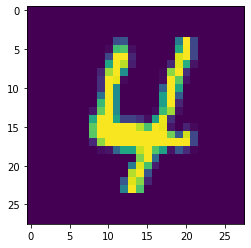

In [48]:
import matplotlib.pyplot as plt  # pip install matplotlib

plt.imshow(data[0][0].view(28,28))
plt.show()

Clearly a 0 indeed.

So, for our checklist:

We've got our data of various featuresets and their respective classes.
That data is all numerical.
We've shuffled the data.
We've split the data into training and testing groups.
Is the data scaled?
Is the data balanced?

Looks like we have a couple more questions to answer. First off is it scaled? Remember earlier I warned that the neural network likes data to be scaled between 0 and 1 or -1 and 1. Raw imagery data is usually RGB, where each pixel is a tuple of values of 0-255, which is a problem. 0 to 255 is not scaled. How about our dataset here? Is it 0-255? or is it scaled already for us? Let's check out some lines:

In [49]:
data[0][0][0][0]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.])

Hmm, it's empty. Makes sense, the first few rows are blank probably in a lot of images. The 2 up above certainly is.

In [50]:
data[0][0][0][7]

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.5922, 0.9922, 0.8980, 0.0824, 0.0000, 0.0000, 0.0000, 0.0000,
        0.1059, 0.9529, 0.6275, 0.0510, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000])

Ah okay, there we go, we can clearly see that... yep this image data is actually already scaled for us.

... in the real world, it wont be.

Like I said: Cheating! Hah. Alright. One more question: Is the data balanced?

**What is data balancing?**

Recall before how I explained that if we don't shuffle our data, the machine will learn things like what the last few hundred classes were in a row, and probably just predict that from there on out.

Well, with data balancing, a similar thing could occur.

Imagine you have a dataset of cats and dogs. 7200 images are dogs, and 1800 are cats. This is quite the imbalance. The classifier is highly likely to find out that it can very quickly and easily get to a 72% accuracy by simple always predicting dog. It is highly unlikely that the model will recover from something like this.

Other times, the imbalance isn't quite as severe, but still enough to make the model almost always predict a certain way except in the most obvious-to-it-of cases. Anyway, it's best if we can balance the dataset.

By "balance," I mean make sure there are the same number of examples for each classifications in training.

Sometimes, this simply isn't possible. There are ways for us to handle for this with special class weighting for the optimizer to take note of, but, even this doesn't always work. Personally, I've never had success with this in any real world application.

In our case, how might we confirm the balance of data? Well, we just need to iterate over everything and make a count. Pretty simple:

In [51]:
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}


for data in trainset:
    Xs, ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total += 1

print(counter_dict)

for i in counter_dict:
    print(f"{i}: {counter_dict[i]/total*100.0}%")

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
0: 9.871666666666666%
1: 11.236666666666666%
2: 9.93%
3: 10.218333333333334%
4: 9.736666666666666%
5: 9.035%
6: 9.863333333333333%
7: 10.441666666666666%
8: 9.751666666666667%
9: 9.915000000000001%


I am sure there's a better way to do this, and there might be a built-in way to do it with torchvision. Anyway, as you can see, the lowest percentage is 9% and the highest is just over 11%. This should be just fine. We could balance this perfectly, but there's likely no need for that.

I'd say we're ready for passing it through a neural network, which is what we'll be doing in the next.

#Building our Neural Network

##Creating a Neural Network

From now onwards we're going to focus on actually creating a neural network. Untill here, we went over the following code for getting our data setup:

In [ ]:
import torch
import torchvision
from torchvision import transforms, datasets

train = datasets.MNIST('', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

test = datasets.MNIST('', train=False, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))


trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=False)

Now, let's actually create our neural network model. To begin, we're going to make a couple of imports from Pytorch:

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

The torch.nn import gives us access to some helpful neural network things, such as various neural network layer types (things like regular fully-connected layers, convolutional layers (for imagery), recurrent layers...etc). For now, we've only spoken about fully-connected layers, so we will just be using those for now.

The torch.nn.functional area specifically gives us access to some handy functions that we might not want to write ourselves. We will be using the relu or "rectified linear" activation function for our neurons. Instead of writing all of the code for these things, we can just import them, since these are things everyone will be needing in their deep learning code.

This is something you can call the Advantage of using Built in Libraries.

To make our model, we're going to create a class. We'll call this class net and this net will inhereit from the nn.Module class:

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()

net = Net()
print(net)

Net()


Nothing much special here, but I know some people might be confused about the init method. Typically, when you inherit from a parent class, that init method doesn't actually get run. This is how we can run that init method of the parent class, which can sometimes be required...because we actually want to initialize things! For example, let's show some classes:

In [ ]:
class a:
    '''Will be a parent class'''
    def __init__(self):
        print("initializing a")

class b(a):
    '''Inherits from a, but does not run a's init method '''
    def __init__(self):
        print("initializing b")

class c(a):
    '''Inhereits from a, but DOES run a's init method'''
    def __init__(self):
        super().__init__()
        print("initializing c")

b_ob = b()

initializing b


Notice how our b_ob doesn't have the a class init method run. If we create a c_ob from the c class though:

In [ ]:
c_ob = c()

initializing a
initializing c


Both init methods are run. Yay. Okay back to neural networks. Let's define our layers

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)

net = Net()
print(net)

All we're doing is just defining values for some layers, we're calling them fc1, fc2...etc, but you could call them whatever you wanted. The fc just stands for fully connected. Fully connected refers to the point that every neuron in this layer is going to be fully connected to attaching neurons. Nothing fancy going on here! Recall, each "connection" comes with weights and possibly biases, so each connection is a "parameter" for the neural network to play with.

In our case, we have 4 layers. Each of our nn.Linear layers expects the first parameter to be the input size, and the 2nd parameter is the output size.

So, our first layer takes in 28x28, because our images are 28x28 images of hand-drawn digits. A basic neural network is going to expect to have a flattened array, so not a 28x28, but instead a 1x784.

Then this outputs 64 connections. This means the next layer, fc2 takes in 64 (the next layer is always going to accept however many connections the previous layer outputs). From here, this layer ouputs 64, then fc3 just does the same thing.

fc4 takes in 64, but outputs 10. Why 10? Our "output" layer needs 10 neurons. Why 10 neurons? We have 10 classes.

Now, that's great, we have those layers, but nothing really dictating how they interact with eachother, they're just simply defined.

The simplest neural network is fully connected, and feed-forward, meaning we go from input to output. In one side and out the other in a "forward" manner. We do not have to do this, but, for this model, we will. So let's define a new method for this network called forward and then dictate how our data will pass through this model:

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.fc4(x)
        return x

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


Notice the x is a parameter for the forward method. This will be our input data. As you can see, we literally just "pass" this data through the layers. This could in theory learn with some problems, but this is going to most likely cause some serious explosions in values. The neural network could control this, but probably wont. Instead, what we're missing is an activation function for the layers.

Recall that we're mimicking brain neurons that either are firing, or not. We use activation functions to take the sum of the input data * weights, and then to determine if the neuron is firing or not. Initially, these were often step functions that were literally either 0 or 1, but then we found that sigmoids and other types of functions were better.

Currently, the most popular is the rectified linear, or relu, activation function.

Basically, these activation functions are keeping our data scaled between 0 and 1.

Finally, for the output layer, we're going to use softmax. Softmax makes sense to use for a multi-class problem, where each thing can only be one class or the other. This means the outputs themselves are a confidence score, adding up to 1.

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


At this point, we've got a neural network that we can actually pass data to, and it will give us an output. Let's see. Let's just create a random image:

In [ ]:
X = torch.randn((28,28))

So this is like our images, a 28x28 tensor (array) of values ranging from 0 to 1. Our neural network wants this to be flattened, however so:

In [ ]:
X = X.view(-1,28*28)

You should understand the 28*28 part, but why the leading -1?

Any input and output to our neural network is expected to be a group feature sets.

Even if you intend to just pass 1 set of features, you still have to pass it as a "list" of features.

In our case, we really just want a 1x784, and we could say that, but you will more often is -1 used in these shapings. Why? -1 suggests "any size". So it could be 1, 12, 92, 15295...etc. It's a handy way for that bit to be variable. In this case, the variable part is how many "samples" we'll pass through.

In [ ]:
output = net(X)

What should we be expecting the output to be? It should be a tensor that contains a tensor of our 10 possible classes:

In [ ]:
output

tensor([[-2.2390, -2.2514, -2.2302, -2.3744, -2.3137, -2.4241, -2.3855, -2.2833,
         -2.1833, -2.3697]], grad_fn=<LogSoftmaxBackward>)

Great. Looks like the forward pass works and everything is as expected. Why was it a tensor in a tensor? Because input and output needs to be variable. Even if we just want to predict on one input, it needs to be a list of inputs and the output will be a list of outputs. Not really a list, it's a tensor, but hopefully you understand what I mean.

Of course, those outputs are pretty worthless to us. Instead, we want to iterate over our dataset as well as do our backpropagation, which is what we'll be getting into now onwards.

#4. Training Neural Network

##Training our Neural Network

Untill now, we created the code for our neural network. Now, we'll be actually training this neural network by learning how to iterate over our data, pass to the model, calculate loss from the result, and then do backpropagation to slowly fit our model to the data.

Code up to this point:

In [ ]:
import torch
import torchvision
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F

train = datasets.MNIST('', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

test = datasets.MNIST('', train=False, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))


trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=False)


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


Luckily for us, the "data" that we're using from Pytorch is actually nice fancy object that is making life easy for us at the moment. It's already in pretty batches and we just need to iterate over it. Next, we want to calculate loss and specify our optimizer:

In [ ]:
import torch.optim as optim

loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

Our *loss_function* is what calculates "how far off" our classifications are from reality. As humans, we tend to think of things in terms of either right, or wrong. With a neural network, and arguably humans too, our accuracy is actually some sort of scaling score.

For example, you might be highly confident that something is the case, but you are wrong. Compare this to a time when you really aren't certain either way, but maybe think something, but are wrong. In these cases, the degree to which you're wrong doesn't matter in terms of the choice necessarily, but in terms of you learning, it does.

In terms of a machine learning by tweaking lots of little parameters to slowly get closer and closer to fitting, it definitely matters how wrong things are.

For this, we use loss, which is a measurement of how far off the neural network is from the targeted output. There are a few types of loss calculations. A popular one is mean squared error, but we're trying to use these scalar-valued classes.

In general, you're going to have two types of classes. One will just be a scalar value, the other is what's called a one_hot array/vector.

In our case, a zero might be classified as:

0 or [1, 0, 0, 0, 0, 0, 0 ,0 ,0 ,0]

[1, 0, 0, 0, 0, 0, 0 ,0 ,0 ,0] is a one_hot array where quite literally one element only is a 1 and the rest are zero. The index that is hot is the classification.

A one_hot vector for a a 3 would be:

[0, 0, 0, 1, 0, 0, 0 ,0 ,0 ,0]

I tend to use one_hot, but this data is specifying a scalar class, so 0, or 1, or 2...and so on.


Depending on what your targets look like, you will need a specific loss.

For one_hot vectors, I tend to use mean squared error.

For these scalar classifications, I use cross entropy.

Next, we have our optimizer. This is the thing that adjusts our model's adjustable parameters like the weights, to slowly, over time, fit our data. I am going to have us using Adam, which is Adaptive Momentum. This is the standard go-to optimizer usually. There's a new one called rectified adam that is gaining steam. I haven't had the chance yet to make use of that in any project, and I do not think it's available as just an importable function in Pytorch yet, but keep your eyes peeled for it! For now, Adam will do just fine I'm sure. The other thing here is lr, which is the learning rate. A good number to start with here is 0.001 or 1e-3. The learning rate dictates the magnitude of changes that the optimizer can make at a time. Thus, the larger the LR, the quicker the model can learn, but also you might find that the steps you allow the optimizer to make are actually too big and the optimizer gets stuck bouncing around rather than improving. Too small, and the model can take much longer to learn as well as also possibly getting stuck.

Imagine the learning rate as the "size of steps" that the optimizer can take as it searches for the bottom of a mountain, where the path to the bottom isn't necessarily a simple straight path down. Here's some lovely imagery to help explain learning rate:

<img src='https://drive.google.com/uc?id=1jJD_XqqMxdn3fNZyBgb0Tkb_OXKJO9zF'>

<img src='https://drive.google.com/uc?id=1Ul8AneETcAeytRIFDEqDoSX04hy3FEhw'>

The black line is the "path" to the bottom of the optimization curve. When it comes to optimizing, sometimes you have to get worse in order to actually get beyond some local optimum. The optimizer doesn't know what the absolute best spot could be, it just takes steps to see if it can find it. Thus, as you can see in the image, if the steps are too big, it will never get to the lower points. If the steps are too small (learning rate too small), it can get stuck as well long before it reaches a bottom. The goal is for something more like:

<img src = 'https://drive.google.com/uc?id=1hxSn0udrO4Y2C7Vrb8xnBxxv7dmaJz6E'>

For simpler tasks, a learning rate of 0.001 usually is more than fine. For more complex tasks, you will see a learning rate with what's called a decay. Basically you start the learning rate at something like 0.001, or 0.01...etc, and then over time, that learning rate gets smaller and smaller. The idea being you can initially train fast, and slowly take smaller steps, hopefully getthing the best of both worlds:



<img src = 'https://drive.google.com/uc?id=1rG8YGoV3RyPkgL1XEWYoWK5x62x5tQWY'>

More on learning rates and decay later. For now, 0.001 will work just fine, and you just need to think of learning rate as what it sounds like: How quickly should we try to get this optimizer to optimize things.

Now we can iterate over our data. In general, you will make more than just 1 pass through your entire training dataset.

Each full pass through your dataset is referred to as an epoch. In general, you will probably have somewhere between 3 and 10 epochs, but there's no hard rule here.

Too few epochs, and your model wont learn everything it could have.



Too many epochs and your model will over fit to your in-sample data (basically memorize the in-sample data, and perform poorly on out of sample data).

Let's go with 3 epochs for now. So we will loop over epochs, and each epoch will loop over our data. Something like:

In [ ]:
for epoch in range(3): # 3 full passes over the data
    for data in trainset:  # `data` is a batch of data
        X, y = data  # X is the batch of features, y is the batch of targets.
        net.zero_grad()  # sets gradients to 0 before loss calc. You will do this likely every step.
        output = net(X.view(-1,784))  # pass in the reshaped batch (recall they are 28x28 atm)
        loss = F.nll_loss(output, y)  # calc and grab the loss value
        loss.backward()  # apply this loss backwards thru the network's parameters
        optimizer.step()  # attempt to optimize weights to account for loss/gradients
    print(loss)  # print loss. We hope loss (a measure of wrong-ness) declines! 

tensor(0.0021, grad_fn=<NllLossBackward>)
tensor(0.0229, grad_fn=<NllLossBackward>)
tensor(0.0095, grad_fn=<NllLossBackward>)


Every line here is commented, but the concept of gradients might not be clear. Once we pass data through our neural network, getting an output, we can compare that output to the desired output. With this, we can compute the gradients for each parameter, which our optimizer (Adam, SGD...etc) uses as information for updating weights.

This is why it's important to do a *net.zero_grad()* for every step, otherwise these gradients will add up for every pass, and then we'll be re-optimizing for previous gradients that we already optimized for. There could be times when you intend to have the gradients sum per pass, like maybe you have a batch of 10, but you want to optimize per 50 or something. I don't think people really do that, but the idea of Pytorch is to let you do whatever you want.

So, for each epoch, and for each batch in our dataset, what do we do?

Grab the features (X) and labels (y) from current batch
Zero the gradients (net.zero_grad)
Pass the data through the network
Calculate the loss
Adjust weights in the network with the hopes of decreasing loss

As we iterate, we get loss, which is an important metric, but we care about accuracy. So, how did we do? To test this, all we need to do is iterate over our test set, measuring for correctness by comparing output to target values.

In [ ]:
correct = 0
total = 0

with torch.no_grad():
    for data in testset:
        X, y = data
        output = net(X.view(-1,784))
        #print(output)
        for idx, i in enumerate(output):
            #print(torch.argmax(i), y[idx])
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1

print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.966


Yeah, I would say we did alright there

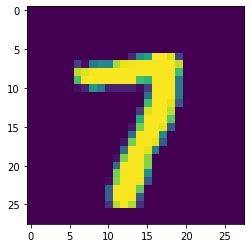

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(X[0].view(28,28))
plt.show()

In [ ]:
print(torch.argmax(net(X[0].view(-1,784))[0]))

tensor(7)


The above might be slightly confusing. I'll break it down.

In [ ]:
a_featureset = X[0]
reshaped_for_network = a_featureset.view(-1,784) # 784 b/c 28*28 image resolution.
output = net(reshaped_for_network) #output will be a list of network predictions.
first_pred = output[0]
print(first_pred)

tensor([-1.9305e+01, -1.2716e+01, -8.1812e+00, -6.3359e+00, -1.8744e+01,
        -2.2179e+01, -2.9998e+01, -2.0695e-03, -1.4146e+01, -1.1324e+01],
       grad_fn=<SelectBackward>)


Which index value is the greatest? We use argmax to find this:

In [ ]:
biggest_index = torch.argmax(first_pred)
print(biggest_index)

tensor(7)


As fun and easy as it is to use a pre-made dataset, one of the first things you really want to do once you learn deep learning is actually do something you're interested in, which often means your own dataset that isn't prepared for us like this one was.

**So, This is my Very First Chapter in Deep Learning with PyTorch, hope you Liked It**